<a href="https://colab.research.google.com/github/wittyicon29/Data-cleaning-using-Pandas-and-Numpy-/blob/main/KSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as no
import seaborn as sns
import missingno as msno
import datetime as dt
from scipy.optimize import curve_fit

In [ ]:
Cepheid_data = pd.read_csv('/content/drive/MyDrive/CepheidData.csv')

In [ ]:
Cepheid_data.head()

,ID,RA,Decl,I,V,P_1
0,OGLE-SMC-CEP-0001,00:20:07.87,-74:32:54.6,17.314,17.897,1.128258
1,OGLE-SMC-CEP-0005,00:21:53.88,-72:22:22.7,17.196,17.768,1.287411
2,OGLE-SMC-CEP-0006,00:21:56.36,-73:54:55.9,17.120,17.770,1.484773
3,OGLE-SMC-CEP-0007,00:22:04.27,-73:26:55.2,17.124,-99.990,1.334199
4,OGLE-SMC-CEP-0009,00:22:25.60,-73:47:03.5,16.814,17.384,1.639233


In [ ]:
Cepheid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2754 entries, 0 to 2753
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2754 non-null   object 
 1   RA      2754 non-null   object 
 2   Decl    2754 non-null   object 
 3   I       2754 non-null   float64
 4   V       2754 non-null   float64
 5   P_1     2754 non-null   float64
dtypes: float64(3), object(3)
memory usage: 129.2+ KB


In [ ]:
Cepheid_data.isna().sum()

ID      0
RA      0
Decl    0
I       0
V       0
P_1     0
dtype: int64

In [ ]:
Cepheid_data.describe()

,I,V,P_1
count,2754.000000,2754.000000,2754.000000
mean,16.041644,12.095656,3.488015
std,4.526668,23.205550,6.718705
min,-99.990000,-99.990000,0.841853
25%,15.674250,16.254750,1.482445
50%,16.486000,17.076000,1.944269
75%,16.886000,17.516000,3.351994
max,18.070000,19.015000,208.799217


<function matplotlib.pyplot.show>

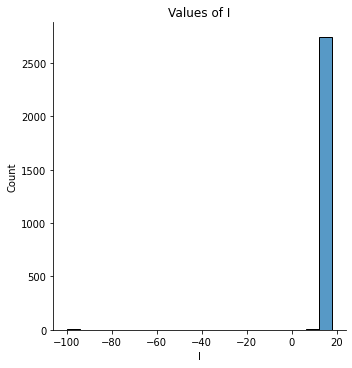

In [ ]:
sns.displot(Cepheid_data['I'],bins =20)
plt.title('Values of I')
plt.show

<function matplotlib.pyplot.show>

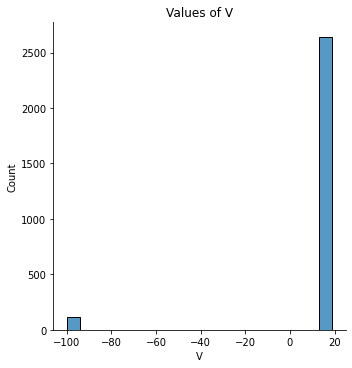

In [ ]:
sns.displot(Cepheid_data['V'],bins =20)
plt.title('Values of V')
plt.show

<function matplotlib.pyplot.show>

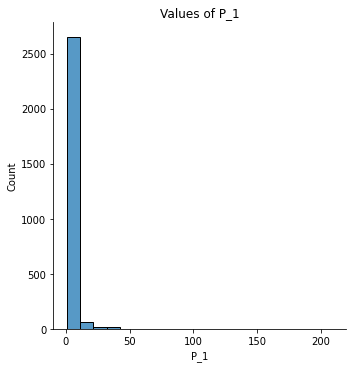

In [ ]:
sns.displot(Cepheid_data['P_1'],bins =20)
plt.title('Values of P_1')
plt.show

In [ ]:
Cepheid_data['I'].unique()

array([17.314, 17.196, 17.12 , ..., 14.063, 13.48 , 15.738])

In [ ]:
Cepheid_data['V'].unique()

array([17.897, 17.768, 17.77 , ..., 15.834, 14.929, 16.458])

In [ ]:
Cepheid_data['P_1'].unique()

array([ 1.1282584,  1.2874115,  1.4847727, ..., 16.4303732,  2.9284749,
        1.0040427])

In [ ]:
Cepheid_data['I'].value_counts()

16.788    7
16.931    6
16.768    6
16.814    6
16.696    6
         ..
16.357    1
14.270    1
12.731    1
17.149    1
15.738    1
Name: I, Length: 1753, dtype: int64

In [ ]:
Cepheid_data['V'].value_counts()

-99.990    113
 17.295      6
 17.076      6
 17.529      6
 17.383      6
          ... 
 16.195      1
 15.520      1
 17.186      1
 16.987      1
 16.458      1
Name: V, Length: 1719, dtype: int64

In [ ]:
Cepheid_data['P_1'].value_counts()

1.128258    1
1.275806    1
1.124129    1
1.531928    1
3.384428    1
           ..
1.011673    1
1.164590    1
2.899468    1
2.608594    1
1.004043    1
Name: P_1, Length: 2754, dtype: int64

In [ ]:
#Removing erroneous magnitude values 
Cepheid_data = Cepheid_data[(Cepheid_data['V']!=-99.990) & (Cepheid_data['I']!=-99.990)]
Cepheid_data

,ID,RA,Decl,I,V,P_1
0,OGLE-SMC-CEP-0001,00:20:07.87,-74:32:54.6,17.314,17.897,1.128258
1,OGLE-SMC-CEP-0005,00:21:53.88,-72:22:22.7,17.196,17.768,1.287411
2,OGLE-SMC-CEP-0006,00:21:56.36,-73:54:55.9,17.120,17.770,1.484773
4,OGLE-SMC-CEP-0009,00:22:25.60,-73:47:03.5,16.814,17.384,1.639233
5,OGLE-SMC-CEP-0010,00:22:29.29,-73:54:16.3,16.976,17.515,1.442611
...,...,...,...,...,...,...
2741,OGLE-SMC-CEP-4967,00:56:34.60,-77:55:13.2,17.328,18.067,1.012830
2749,OGLE-SMC-CEP-4983,01:50:40.50,-70:30:13.0,15.224,15.834,4.372303
2750,OGLE-SMC-CEP-4985,01:56:47.74,-73:49:37.1,14.063,14.929,8.040087
2752,OGLE-SMC-CEP-4987,03:31:34.40,-70:59:38.2,15.738,16.458,2.928475


In [ ]:
#HMS & DMS to degrees
ra = Cepheid_data['RA'].str.split(pat = ':', expand = True)
ra[0], ra[1], ra[2] = pd.to_numeric(ra[0]), pd.to_numeric(ra[1]), pd.to_numeric(ra[2])
ra[4] = 15 * ra[0] + 15 * ra[1] / 60 + 15 * ra[2] / 3600

dec = Cepheid_data['Decl'].str.split(pat = ':', expand = True)
dec[0], dec[1], dec[2] = pd.to_numeric(dec[0]), pd.to_numeric(dec[1]), pd.to_numeric(dec[2])
print('Declination stats:\n',dec[0].describe()) #Notice all values are negative
dec[4] = dec[0] - dec[1] / 60 - dec[2] / 3600   #So this conversion can be used

Cepheid_data['ra'], Cepheid_data['dec'] = ra[4], dec[4]
Cepheid_data

Declination stats:
 count    2637.000000
mean      -72.487296
std         0.853188
min       -77.000000
25%       -73.000000
50%       -73.000000
75%       -72.000000
max       -64.000000
Name: 0, dtype: float64


,ID,RA,Decl,I,V,P_1,ra,dec
0,OGLE-SMC-CEP-0001,00:20:07.87,-74:32:54.6,17.314,17.897,1.128258,5.032792,-74.548500
1,OGLE-SMC-CEP-0005,00:21:53.88,-72:22:22.7,17.196,17.768,1.287411,5.474500,-72.372972
2,OGLE-SMC-CEP-0006,00:21:56.36,-73:54:55.9,17.120,17.770,1.484773,5.484833,-73.915528
4,OGLE-SMC-CEP-0009,00:22:25.60,-73:47:03.5,16.814,17.384,1.639233,5.606667,-73.784306
5,OGLE-SMC-CEP-0010,00:22:29.29,-73:54:16.3,16.976,17.515,1.442611,5.622042,-73.904528
...,...,...,...,...,...,...,...,...
2741,OGLE-SMC-CEP-4967,00:56:34.60,-77:55:13.2,17.328,18.067,1.012830,14.144167,-77.920333
2749,OGLE-SMC-CEP-4983,01:50:40.50,-70:30:13.0,15.224,15.834,4.372303,27.668750,-70.503611
2750,OGLE-SMC-CEP-4985,01:56:47.74,-73:49:37.1,14.063,14.929,8.040087,29.198917,-73.826972
2752,OGLE-SMC-CEP-4987,03:31:34.40,-70:59:38.2,15.738,16.458,2.928475,52.893333,-70.993944


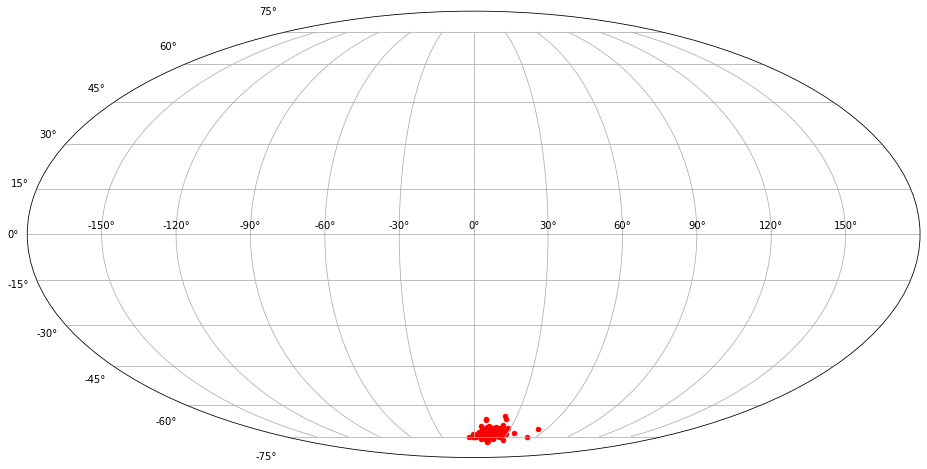

In [ ]:
#RA, Dec co-ordinates plot
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111, projection='mollweide')

#Converting the RA range from 0 - 360 to -180 - 180
ra_fixed = Cepheid_data['ra'].to_numpy()
ra_fixed[ra_fixed > 180] = ra_fixed[ra_fixed > 180] - 360

#Plotting needs to be done with input angles as radians. 
ax.scatter(ra_fixed*no.pi/180, Cepheid_data['dec']*no.pi/180, marker = 'o', s=20, color = 'red')
plt.grid()

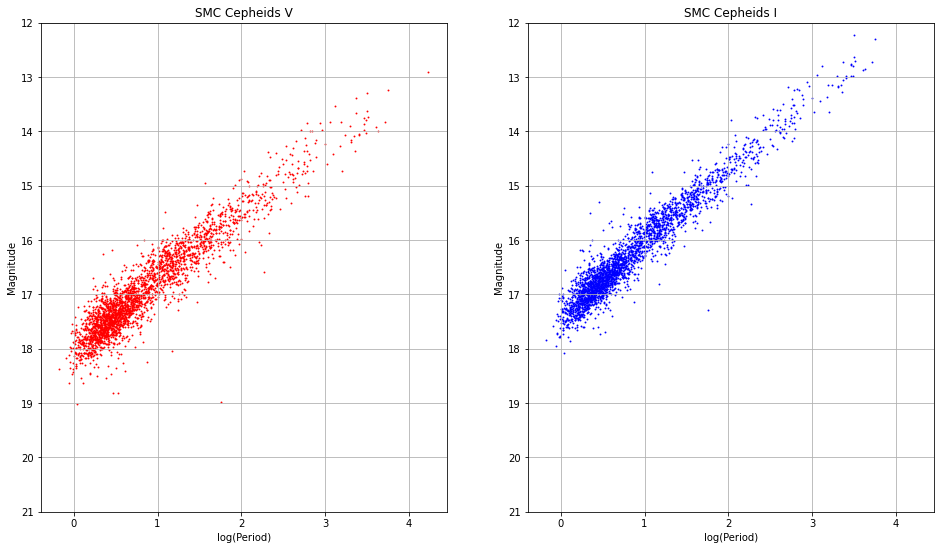

In [ ]:
#P-L Diagrams
fig = plt.figure(figsize = (16,9))

#V band plot
ax1 = fig.add_subplot(121)
ax1.scatter(no.log(Cepheid_data['P_1']), Cepheid_data['V'], color = 'red', s = 0.8)
ax1.set_title('SMC Cepheids V')
ax1.set_ylim(21,12)
ax1.set_xlabel('log(Period)')
ax1.set_ylabel('Magnitude')
ax1.grid()

#I band plot
ax2 = fig.add_subplot(122)
ax2.scatter(no.log(Cepheid_data['P_1']), Cepheid_data['I'], color = 'blue', s = 0.8)
ax2.set_title('SMC Cepheids I')
ax2.set_ylim(21,12)
ax2.set_xlabel('log(Period)')
ax2.set_ylabel('Magnitude')
ax2.grid()

[17.98537783574373, 17.392207055244064]

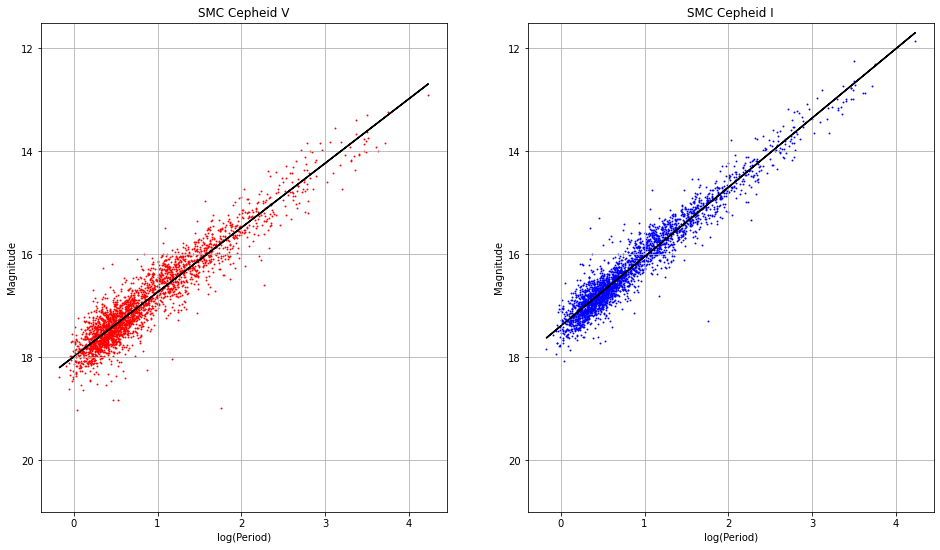

In [ ]:
#Defining the linear fit function
def lin(x, m, c):
    return m*x+c

band = ['V', 'I']
color = ['red', 'blue']
fig, axes = plt.subplots(1,2,figsize = (16,9))
ZP = []

#Curve fitting using the linear function to both V and I band and plotting the best fit line
for i in range(2):
    p_opt, p_cov = curve_fit(lin, no.log(Cepheid_data['P_1']), Cepheid_data[band[i]])
    axes[i].scatter(no.log(Cepheid_data['P_1']), Cepheid_data[band[i]], color = color[i], s = 0.8)
    axes[i].plot(no.log(Cepheid_data['P_1']), lin(no.log(Cepheid_data['P_1']), *p_opt), color = 'black')
    axes[i].set_ylim(21,11.5)
    axes[i].grid()
    axes[i].set_title('SMC Cepheid '+band[i])
    axes[i].set_xlabel('log(Period)')
    axes[i].set_ylabel('Magnitude')
    ZP.append(p_opt[1])
ZP